<a href="https://colab.research.google.com/github/satya328/titaanic-survival-predition/blob/main/cat_and_dog_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import shutil

# Ensure the directory exists
os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)

# Define source and destination paths
source = "kaggle.json"  # Make sure this file exists in your current working directory
destination = os.path.expanduser("~/.kaggle/kaggle.json")

# Copy the file
try:
    shutil.copy(source, destination)
    print("File copied successfully.")
except FileNotFoundError:
    print(f"{source} not found. Make sure the file exists.")


File copied successfully.


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats --force


Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:27<00:00, 41.2MB/s]
100% 1.06G/1.06G [00:27<00:00, 41.9MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [31]:
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)
validition_ds =keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [27]:
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

  train_ds = train_ds.map(process)
  validation_ds = validation_ds.map(process)

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout #

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(1,activation='relu'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [25]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [41]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import fetch_20newsgroups
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load and preprocess dataset
newsgroups_data = fetch_20newsgroups(subset='all', categories=['sci.space', 'rec.sport.baseball'])
X = newsgroups_data.data  # Text data
y = newsgroups_data.target  # Labels

# Encode the labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize the text data
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)

# Pad the sequences to ensure uniform input size
max_length = 200
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_val_pad = pad_sequences(X_val_seq, maxlen=max_length, padding='post')

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=10000, output_dim=64, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train_pad,
    y_train,
    epochs=10,
    validation_data=(X_val_pad, y_val),
    batch_size=32
)

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(X_val_pad, y_val)
print(f"Validation Accuracy: {val_accuracy:.4f}")


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


50/50 ━━━━━━━━━━━━━━━━━━━━ 29s 453ms/step - accuracy: 0.5735 - loss: 0.6616 - val_accuracy: 0.9421 - val_loss: 0.2191
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 34s 320ms/step - accuracy: 0.9263 - loss: 0.2505 - val_accuracy: 0.9521 - val_loss: 0.1241
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 36s 631ms/step - accuracy: 0.9643 - loss: 0.1336 - val_accuracy: 0.9395 - val_loss: 0.2343
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 25s 319ms/step - accuracy: 0.9743 - loss: 0.1233 - val_accuracy: 0.9698 - val_loss: 0.0747
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 27s 444ms/step - accuracy: 0.9948 - loss: 0.0197 - val_accuracy: 0.9924 - val_loss: 0.0305
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 43s 483ms/step - accuracy: 0.9999 - loss: 0.0038 - val_accuracy: 0.9723 - val_loss: 0.0589
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 14s 280ms/step - accuracy: 0.9995 - loss: 0.0034 - val_accuracy: 0.9824 - val_loss: 0.0556
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 29s 461ms/step - accuracy: 1.0000 - loss: 5.1550e-04 - val_accuracy: 0

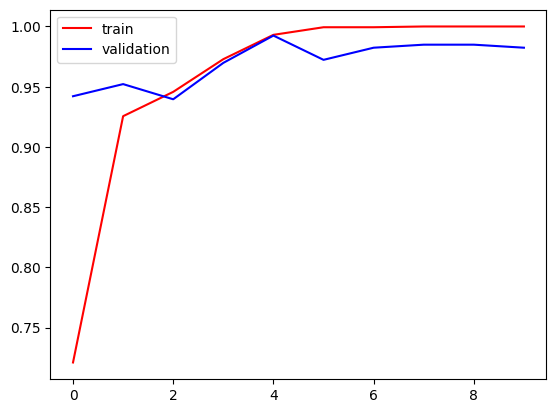

In [43]:
import matplotlib.pyplot as plt

# Access training history using history.history
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

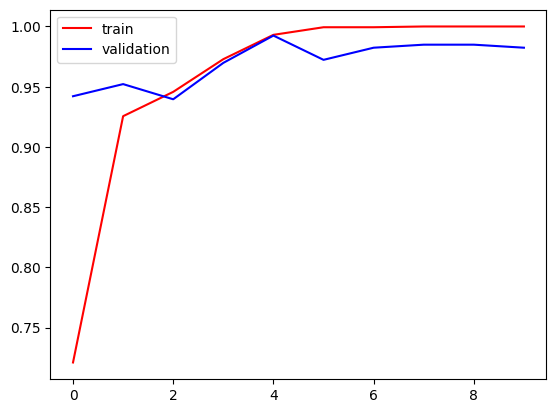

In [44]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

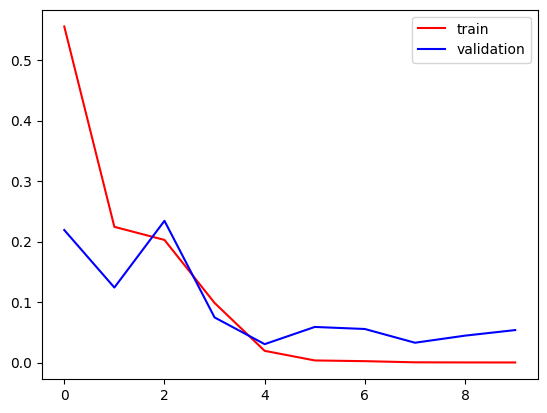

In [45]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()


In [50]:
import cv2
test_image = cv2.imread('/content/cat.jpeg')

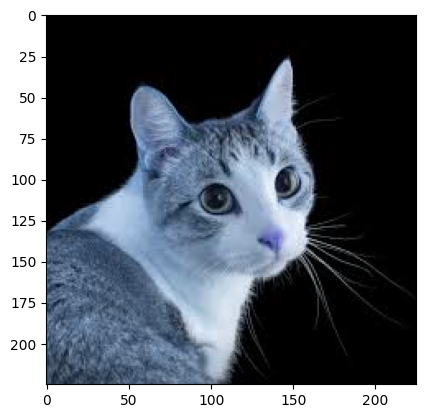

In [51]:
plt.imshow(test_image)

In [52]:
test_image.shape

(225, 225, 3)

In [60]:
test_image = cv2.resize(test_image,(200,200))

In [64]:
# Assuming test_input is a single piece of text
test_input = ["This is a test input for the model."]

# Tokenize and pad the input
test_input_seq = tokenizer.texts_to_sequences(test_input)
test_input_pad = pad_sequences(test_input_seq, maxlen=200, padding='post')

# Predict using the model
prediction = model.predict(test_input_pad) # Use the padded sequence as an input to the model
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
[[0.03085002]]
